In [333]:
import sportsdataverse as sdv
import pandas as pd
import polars
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [50]:
mbb_df = sportsdataverse.mbb.load_mbb_team_boxscore(seasons=range(2024,2025))

100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


In [51]:
mbb_df.head()

game_id,season,season_type,game_date,game_date_time,team_id,team_uid,team_slug,team_location,team_name,team_abbreviation,team_display_name,team_short_display_name,team_color,team_alternate_color,team_logo,team_home_away,team_score,team_winner,assists,blocks,defensive_rebounds,fast_break_points,field_goal_pct,field_goals_made,field_goals_attempted,flagrant_fouls,fouls,free_throw_pct,free_throws_made,free_throws_attempted,largest_lead,offensive_rebounds,points_in_paint,steals,team_turnovers,technical_fouls,three_point_field_goal_pct,three_point_field_goals_made,three_point_field_goals_attempted,total_rebounds,total_technical_fouls,total_turnovers,turnover_points,turnovers,opponent_team_id,opponent_team_uid,opponent_team_slug,opponent_team_location,opponent_team_name,opponent_team_abbreviation,opponent_team_display_name,opponent_team_short_display_name,opponent_team_color,opponent_team_alternate_color,opponent_team_logo,opponent_team_score
i32,i32,i32,date,"datetime[μs, America/New_York]",i32,str,str,str,str,str,str,str,str,str,str,str,i32,bool,i32,i32,i32,str,f64,i32,i32,i32,i32,f64,i32,i32,str,i32,str,i32,i32,i32,f64,i32,i32,i32,i32,i32,str,i32,i32,str,str,str,str,str,str,str,str,str,str,i32
401638645,2024,3,2024-04-08,2024-04-08 21:20:00 EDT,2509,"""s:40~l:41~t:25…","""purdue-boilerm…","""Purdue""","""Boilermakers""","""PUR""","""Purdue Boilerm…","""Purdue""","""000000""","""cfb991""","""https://a.espn…","""away""",60,false,8,3,19,"""0""",44.4,24,54,0,15,73.3,11,15,"""2""",9,"""40""",3,0,0,14.3,1,7,28,0,9,"""13""",9,41,"""s:40~l:41~t:41…","""uconn-huskies""","""UConn""","""Huskies""","""CONN""","""UConn Huskies""","""UConn""","""0c2340""","""f1f2f3""","""https://a.espn…",75
401638645,2024,3,2024-04-08,2024-04-08 21:20:00 EDT,41,"""s:40~l:41~t:41…","""uconn-huskies""","""UConn""","""Huskies""","""CONN""","""UConn Huskies""","""UConn""","""0c2340""","""f1f2f3""","""https://a.espn…","""home""",75,true,18,4,21,"""2""",48.4,30,62,0,18,81.8,9,11,"""18""",14,"""44""",3,2,0,27.3,6,22,35,0,8,"""11""",8,2509,"""s:40~l:41~t:25…","""purdue-boilerm…","""Purdue""","""Boilermakers""","""PUR""","""Purdue Boilerm…","""Purdue""","""000000""","""cfb991""","""https://a.espn…",60
401638644,2024,3,2024-04-06,2024-04-06 20:51:00 EDT,333,"""s:40~l:41~t:33…","""alabama-crimso…","""Alabama""","""Crimson Tide""","""ALA""","""Alabama Crimso…","""Alabama""","""9e1632""","""ffffff""","""https://a.espn…","""away""",72,false,9,5,21,"""0""",44.8,26,58,0,15,81.8,9,11,"""5""",8,"""26""",2,1,0,47.8,11,23,29,0,8,"""6""",8,41,"""s:40~l:41~t:41…","""uconn-huskies""","""UConn""","""Huskies""","""CONN""","""UConn Huskies""","""UConn""","""0c2340""","""f1f2f3""","""https://a.espn…",86
401638644,2024,3,2024-04-06,2024-04-06 20:51:00 EDT,41,"""s:40~l:41~t:41…","""uconn-huskies""","""UConn""","""Huskies""","""CONN""","""UConn Huskies""","""UConn""","""0c2340""","""f1f2f3""","""https://a.espn…","""home""",86,true,20,8,25,"""2""",50.0,31,62,0,17,77.8,14,18,"""16""",12,"""38""",4,0,0,40.0,10,25,37,0,4,"""8""",4,333,"""s:40~l:41~t:33…","""alabama-crimso…","""Alabama""","""Crimson Tide""","""ALA""","""Alabama Crimso…","""Alabama""","""9e1632""","""ffffff""","""https://a.espn…",72
401638643,2024,3,2024-04-06,2024-04-06 18:09:00 EDT,152,"""s:40~l:41~t:15…","""nc-state-wolfp…","""NC State""","""Wolfpack""","""NCSU""","""NC State Wolfp…","""NC State""","""cc0000""","""ffffff""","""https://a.espn…","""away""",50,false,10,3,22,"""2""",36.8,21,57,0,13,75.0,3,4,"""0""",6,"""20""",8,0,0,26.3,5,19,28,0,11,"""10""",11,2509,"""s:40~l:41~t:25…","""purdue-boilerm…","""Purdue""","""Boilermakers""","""PUR""","""Purdue Boilerm…","""Purdue""","""000000""","""cfb991""","""https://a.espn…",63


In [52]:
mbb_df = mbb_df.to_pandas()

In [153]:
mbb_df = mbb_df.fillna(value=0)
mbb_df = mbb_df.astype({'fast_break_points': 'int32', 'largest_lead': 'int32', 'points_in_paint' : 'int32',
              'turnover_points' : 'int32'})
mbb_df.head()

,game_id,season,season_type,game_date,game_date_time,team_id,team_uid,team_slug,team_location,team_name,...,opponent_team_slug,opponent_team_location,opponent_team_name,opponent_team_abbreviation,opponent_team_display_name,opponent_team_short_display_name,opponent_team_color,opponent_team_alternate_color,opponent_team_logo,opponent_team_score
0,401638645,2024,3,2024-04-08,2024-04-08 21:20:00-04:00,2509,s:40~l:41~t:2509,purdue-boilermakers,Purdue,Boilermakers,...,uconn-huskies,UConn,Huskies,CONN,UConn Huskies,UConn,0c2340,f1f2f3,https://a.espncdn.com/i/teamlogos/ncaa/500/41.png,75
1,401638645,2024,3,2024-04-08,2024-04-08 21:20:00-04:00,41,s:40~l:41~t:41,uconn-huskies,UConn,Huskies,...,purdue-boilermakers,Purdue,Boilermakers,PUR,Purdue Boilermakers,Purdue,000000,cfb991,https://a.espncdn.com/i/teamlogos/ncaa/500/250...,60
2,401638644,2024,3,2024-04-06,2024-04-06 20:51:00-04:00,333,s:40~l:41~t:333,alabama-crimson-tide,Alabama,Crimson Tide,...,uconn-huskies,UConn,Huskies,CONN,UConn Huskies,UConn,0c2340,f1f2f3,https://a.espncdn.com/i/teamlogos/ncaa/500/41.png,86
3,401638644,2024,3,2024-04-06,2024-04-06 20:51:00-04:00,41,s:40~l:41~t:41,uconn-huskies,UConn,Huskies,...,alabama-crimson-tide,Alabama,Crimson Tide,ALA,Alabama Crimson Tide,Alabama,9e1632,ffffff,https://a.espncdn.com/i/teamlogos/ncaa/500/333...,72
4,401638643,2024,3,2024-04-06,2024-04-06 18:09:00-04:00,152,s:40~l:41~t:152,nc-state-wolfpack,NC State,Wolfpack,...,purdue-boilermakers,Purdue,Boilermakers,PUR,Purdue Boilermakers,Purdue,000000,cfb991,https://a.espncdn.com/i/teamlogos/ncaa/500/250...,63


In [145]:
mbb_df.columns

Index(['game_id', 'season', 'season_type', 'game_date', 'game_date_time',
       'team_id', 'team_uid', 'team_slug', 'team_location', 'team_name',
       'team_abbreviation', 'team_display_name', 'team_short_display_name',
       'team_color', 'team_alternate_color', 'team_logo', 'team_home_away',
       'team_score', 'team_winner', 'assists', 'blocks', 'defensive_rebounds',
       'fast_break_points', 'field_goal_pct', 'field_goals_made',
       'field_goals_attempted', 'flagrant_fouls', 'fouls', 'free_throw_pct',
       'free_throws_made', 'free_throws_attempted', 'largest_lead',
       'offensive_rebounds', 'points_in_paint', 'steals', 'team_turnovers',
       'technical_fouls', 'three_point_field_goal_pct',
       'three_point_field_goals_made', 'three_point_field_goals_attempted',
       'total_rebounds', 'total_technical_fouls', 'total_turnovers',
       'turnover_points', 'turnovers', 'opponent_team_id', 'opponent_team_uid',
       'opponent_team_slug', 'opponent_team_location',

In [242]:
raw_input_df = pd.DataFrame() 
game_ids = list(mbb_df['game_id'].drop_duplicates())


desired_averages = ['team_score', 'assists', 'blocks', 'defensive_rebounds',
       'fast_break_points', 'field_goal_pct', 'field_goals_made',
       'field_goals_attempted', 'flagrant_fouls', 'fouls', 'free_throw_pct',
       'free_throws_made', 'free_throws_attempted', 'largest_lead',
       'offensive_rebounds', 'points_in_paint', 'steals', 'team_turnovers',
       'technical_fouls', 'three_point_field_goal_pct',
       'three_point_field_goals_made', 'three_point_field_goals_attempted',
       'total_rebounds', 'total_technical_fouls', 'total_turnovers',
       'turnover_points', 'turnovers']

columnsName = ['game_id', 'team_1_id', 'team_2_id', 'team_home_away'] 
for average in desired_averages:
    columnsName.append('team_1_avg_' + average)
for average in desired_averages:
    columnsName.append('team_2_avg_' + average)

columnsName.append('team_winner')

raw_input_df = pd.DataFrame(columns = columnsName) 

for game_id in game_ids: 
    game_entries = mbb_df[mbb_df['game_id'] == game_id]    
    
    date = list(game_entries['game_date'])[0]
    team_id_first = list(game_entries['team_id'])[0]
    team_id_second = list(game_entries['team_id'])[1]
    
    past_games_first = mbb_df[(mbb_df['game_date'] < date) & (mbb_df['team_id'] == team_id_first)]
    past_games_second = mbb_df[(mbb_df['game_date'] < date) & (mbb_df['team_id'] == team_id_second)]

    if len(past_games_first) == 0 or len(past_games_second) == 0:
        continue
    
    newEntry = [game_id, team_id_first, team_id_second] 
    
    if game_entries[(game_entries['team_id'] == team_id_first)]['team_home_away'].values[0] == 'away': 
        newEntry.append(0) 
    else:
        newEntry.append(1) 
    
    for average in desired_averages:
        newEntry.append(past_games_first[average].mean())
    for average in desired_averages:
        newEntry.append(past_games_second[average].mean())
    
    if game_entries[(game_entries['team_id'] == team_id_first)]['team_winner'].values[0]: 
        newEntry.append(1) 
    else:
        newEntry.append(0)
    
    raw_input_df.loc[len(raw_input_df)] = newEntry

raw_input_df

,game_id,team_1_id,team_2_id,team_home_away,team_1_avg_team_score,team_1_avg_assists,team_1_avg_blocks,team_1_avg_defensive_rebounds,team_1_avg_fast_break_points,team_1_avg_field_goal_pct,...,team_2_avg_technical_fouls,team_2_avg_three_point_field_goal_pct,team_2_avg_three_point_field_goals_made,team_2_avg_three_point_field_goals_attempted,team_2_avg_total_rebounds,team_2_avg_total_technical_fouls,team_2_avg_total_turnovers,team_2_avg_turnover_points,team_2_avg_turnovers,team_winner
0,401638645.0,2509.0,41.0,0.0,82.921053,18.736842,3.657895,28.473684,7.184211,48.828947,...,0.358974,35.548718,8.564103,23.820513,38.923077,0.358974,9.615385,13.051282,9.615385,0.0
1,401638644.0,333.0,41.0,0.0,90.638889,16.055556,4.361111,27.055556,14.083333,47.922222,...,0.368421,35.431579,8.526316,23.789474,38.973684,0.368421,9.763158,13.184211,9.763158,0.0
2,401638643.0,152.0,2509.0,0.0,76.275000,13.150000,3.625000,25.250000,12.150000,45.485000,...,0.135135,40.032432,8.297297,20.432432,40.756757,0.135135,11.270270,9.756757,11.270270,0.0
3,401641124.0,282.0,2550.0,0.0,85.052632,17.789474,1.868421,28.315789,10.631579,50.710526,...,0.111111,33.216667,6.194444,18.444444,37.444444,0.111111,12.722222,14.111111,12.722222,0.0
4,401641122.0,61.0,2550.0,0.0,74.916667,11.805556,3.138889,25.805556,9.777778,43.233333,...,0.085714,33.022857,6.142857,18.400000,37.228571,0.085714,12.771429,14.228571,12.771429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,401597995.0,573.0,2449.0,0.0,53.000000,11.000000,2.000000,21.000000,2.000000,34.400000,...,0.000000,40.700000,11.000000,27.000000,55.000000,0.000000,17.000000,24.000000,17.000000,0.0
5734,401594010.0,3141.0,2458.0,0.0,56.000000,7.000000,4.000000,17.000000,3.000000,33.300000,...,0.000000,39.100000,9.000000,23.000000,46.000000,0.000000,7.000000,25.000000,7.000000,0.0
5735,401591581.0,2710.0,2567.0,0.0,68.000000,9.000000,10.000000,35.000000,10.000000,32.000000,...,0.000000,11.100000,2.000000,18.000000,46.000000,0.000000,10.000000,17.000000,10.000000,0.0
5736,401589361.0,2083.0,219.0,0.0,57.000000,12.000000,2.000000,24.000000,2.000000,38.900000,...,0.000000,38.700000,12.000000,31.000000,49.000000,0.000000,13.000000,25.000000,13.000000,0.0


In [243]:
input_df = raw_input_df.astype({'game_id': 'int32', 'team_1_id': 'int32', 'team_2_id' : 'int32',
              'team_home_away' : 'int32', 'team_winner' : 'int32'})

In [246]:
input_df.head()

,game_id,team_1_id,team_2_id,team_home_away,team_1_avg_team_score,team_1_avg_assists,team_1_avg_blocks,team_1_avg_defensive_rebounds,team_1_avg_fast_break_points,team_1_avg_field_goal_pct,...,team_2_avg_technical_fouls,team_2_avg_three_point_field_goal_pct,team_2_avg_three_point_field_goals_made,team_2_avg_three_point_field_goals_attempted,team_2_avg_total_rebounds,team_2_avg_total_technical_fouls,team_2_avg_total_turnovers,team_2_avg_turnover_points,team_2_avg_turnovers,team_winner
0,401638645,2509,41,0,82.921053,18.736842,3.657895,28.473684,7.184211,48.828947,...,0.358974,35.548718,8.564103,23.820513,38.923077,0.358974,9.615385,13.051282,9.615385,0
1,401638644,333,41,0,90.638889,16.055556,4.361111,27.055556,14.083333,47.922222,...,0.368421,35.431579,8.526316,23.789474,38.973684,0.368421,9.763158,13.184211,9.763158,0
2,401638643,152,2509,0,76.275000,13.150000,3.625000,25.250000,12.150000,45.485000,...,0.135135,40.032432,8.297297,20.432432,40.756757,0.135135,11.270270,9.756757,11.270270,0
3,401641124,282,2550,0,85.052632,17.789474,1.868421,28.315789,10.631579,50.710526,...,0.111111,33.216667,6.194444,18.444444,37.444444,0.111111,12.722222,14.111111,12.722222,0
4,401641122,61,2550,0,74.916667,11.805556,3.138889,25.805556,9.777778,43.233333,...,0.085714,33.022857,6.142857,18.400000,37.228571,0.085714,12.771429,14.228571,12.771429,0


In [326]:
X = input_df.iloc[:,4:-1]
y = input_df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   random_state=104,  
                                   test_size=0.20,  
                                   shuffle=True)

clf = SVC(kernel = 'rbf') 
 
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

/Users/tanish/anaconda3/envs/tricomm/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [327]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

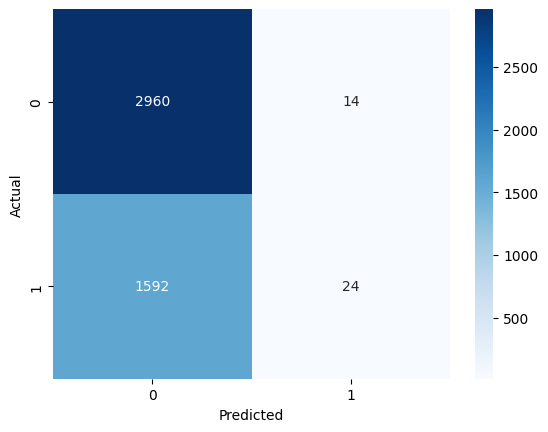

In [328]:
cm = confusion_matrix(y_train, clf.predict(X_train))

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [289]:
sportsdataverse.mbb.mbb_pbp.espn_mbb_pbp(game_id = 401638645)['boxscore']['players'][1]['statistics'][0]['athletes']

[{'active': False,
  'athlete': {'id': '4917149',
   'uid': 's:40~l:41~a:4917149',
   'guid': '80088292-4b09-39c6-b079-79c090c5a986',
   'displayName': 'Alex Karaban',
   'shortName': 'A. Karaban',
   'links': [{'rel': ['playercard', 'desktop', 'athlete'],
     'href': 'https://www.espn.com/mens-college-basketball/player/_/id/4917149/alex-karaban',
     'text': 'Player Card'}],
   'headshot': {'href': 'https://a.espncdn.com/i/headshots/mens-college-basketball/players/full/4917149.png',
    'alt': 'Alex Karaban'},
   'jersey': '11',
   'position': {'name': 'Forward',
    'displayName': 'Forward',
    'abbreviation': 'F'}},
  'starter': True,
  'didNotPlay': False,
  'ejected': False,
  'stats': ['36',
   '2-7',
   '1-6',
   '0-0',
   '3',
   '3',
   '6',
   '4',
   '0',
   '2',
   '0',
   '0',
   '5']},
 {'active': False,
  'athlete': {'id': '5105565',
   'uid': 's:40~l:41~a:5105565',
   'guid': '069d1202-d59b-31e4-9f66-db1e56f009f4',
   'displayName': 'Donovan Clingan',
   'shortName':

/Users/tanish/anaconda3/envs/tricomm/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


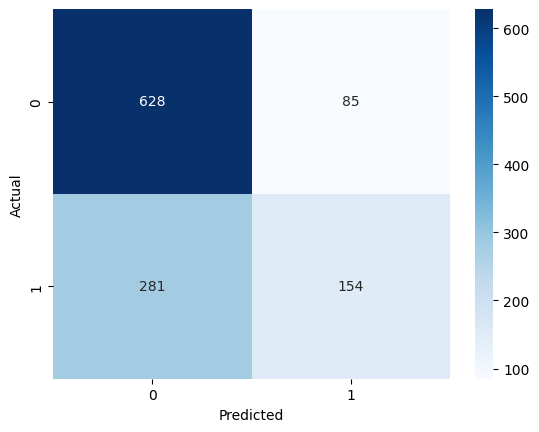

In [342]:
rf = RandomForestClassifier(max_depth = 20)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()